In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://yahoo-weather5.p.rapidapi.com/weather"
querystring = {"location": "Delhi", "format": "json", "u": "f"}
API_KEY = os.environ.get("RAPIDAPI_WEATHER_KEY")
headers = {
	"x-rapidapi-key": "API_KEY",
	"x-rapidapi-host": "yahoo-weather5.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)

data = response.json()

In [3]:
location_info = data.get('location', {})
forecast_list = data.get('forecasts', [])
wind_data = data.get("current_observation", {}).get("wind",{})

In [4]:
df = pd.DataFrame(forecast_list)

In [5]:
df["wind_speed"] = wind_data.get("speed", None)
df["wind_direction"] = wind_data.get("direction", None)
df["wind_chill"] = wind_data.get("chill", None)

In [6]:
# Preprocessing
df['date'] = pd.to_datetime(df['date'], unit='s')
df["date"] = pd.to_datetime(df["date"]).dt.date
df.rename(columns={'high': 'max_temp', 'low': 'min_temp', 'text': 'weather_condition'}, inplace=True)

In [7]:
df['max_temp'] = (df['max_temp'] - 32) * 5.0/9.0
df['min_temp'] = (df['min_temp'] - 32) * 5.0/9.0

In [8]:
df.head(10)

,day,date,max_temp,min_temp,weather_condition,code,wind_speed,wind_direction,wind_chill
0,Sat,2025-02-01,25.000000,11.666667,Mostly Sunny,34,5,SE,77
1,Sun,2025-02-02,24.444444,9.444444,Haze,21,5,SE,77
2,Mon,2025-02-03,23.333333,11.666667,Haze,21,5,SE,77
3,Tue,2025-02-04,23.333333,11.666667,Partly Cloudy,30,5,SE,77
4,Wed,2025-02-05,23.333333,9.444444,Haze,21,5,SE,77
5,Thu,2025-02-06,22.222222,8.333333,Haze,21,5,SE,77
6,Fri,2025-02-07,25.000000,8.888889,Haze,21,5,SE,77
7,Sat,2025-02-08,25.555556,11.111111,Mostly Sunny,34,5,SE,77
8,Sun,2025-02-09,26.666667,13.333333,Partly Cloudy,30,5,SE,77
9,Mon,2025-02-10,23.888889,10.000000,Sunny,32,5,SE,77


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                11 non-null     object 
 1   date               11 non-null     object 
 2   max_temp           11 non-null     float64
 3   min_temp           11 non-null     float64
 4   weather_condition  11 non-null     object 
 5   code               11 non-null     int64  
 6   wind_speed         11 non-null     int64  
 7   wind_direction     11 non-null     object 
 8   wind_chill         11 non-null     int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 924.0+ bytes


# Visualization

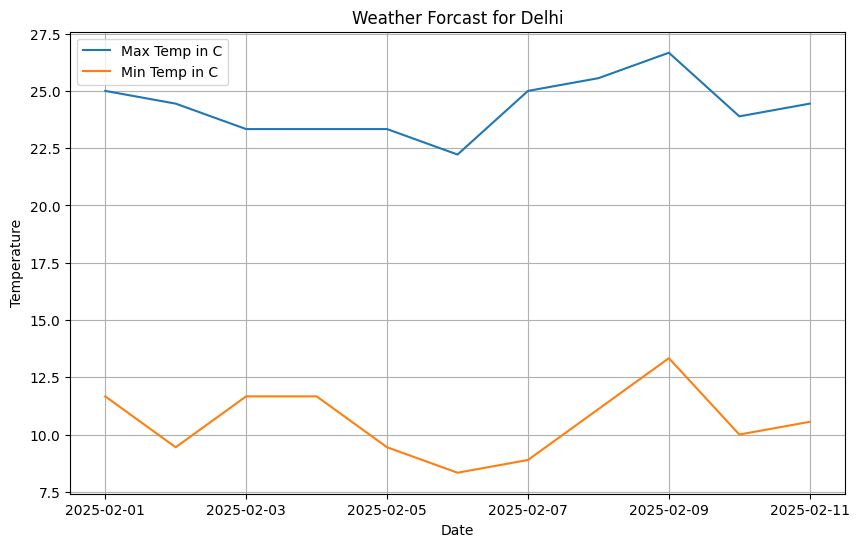

In [10]:
# Min and Max temp

plt.figure(figsize=(10, 6))

sns.lineplot(data=df ,x='date', y='max_temp', label="Max Temp in C")
sns.lineplot(data=df ,x='date', y='min_temp', label="Min Temp in C")

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Weather Forcast for Delhi")
plt.legend()
plt.grid()
plt.show()

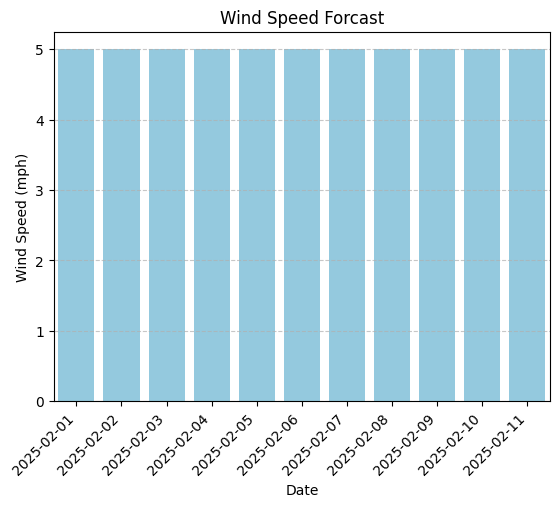

In [11]:
# Wind Speed Barchart

plt.Figure(figsize=(12,6))
sns.barplot(data=df, x='date', y='wind_speed', color="skyblue", dodge=False)
plt.xlabel("Date")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed Forcast")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

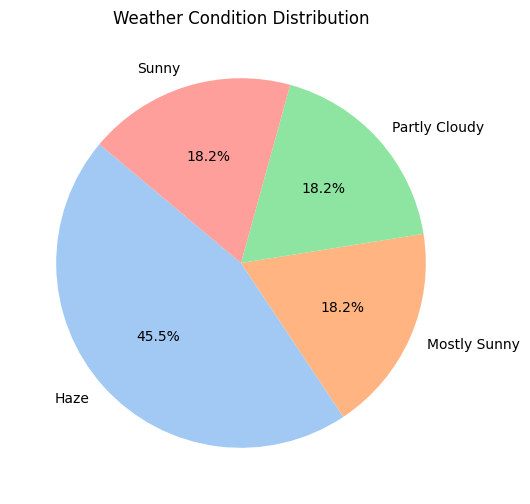

In [12]:
plt.figure(figsize=(10,6))
weather_counts = df["weather_condition"].value_counts()
colors= sns.color_palette("pastel", len(weather_counts))
plt.pie(weather_counts, labels=weather_counts.index, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Weather Condition Distribution")
plt.show()

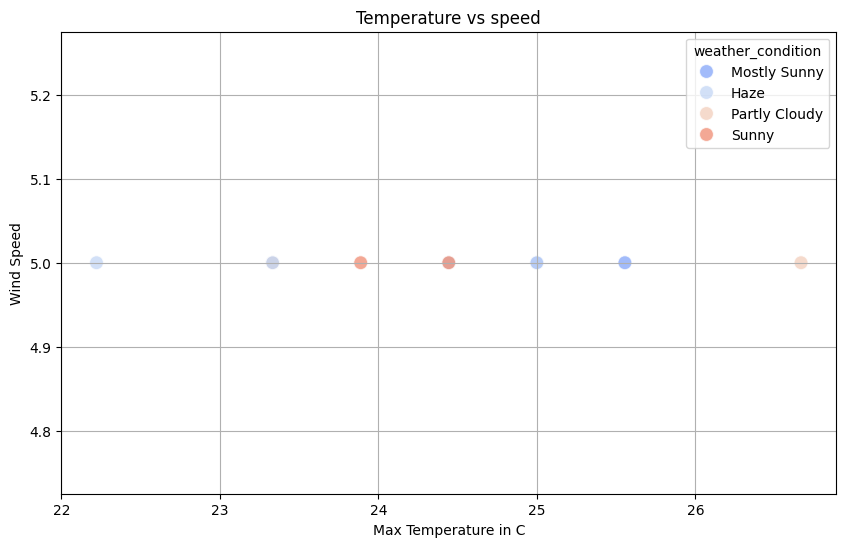

In [13]:
df["wind_speed_jittered"] = df["wind_speed"] + \
    np.random.uniform(-0.3, 0.3, size=len(df))
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x="max_temp", 
    y="wind_speed",
    hue="weather_condition", 
    palette="coolwarm",
    s=100,  
    alpha=0.7
)
plt.xlabel("Max Temperature in C")
plt.ylabel("Wind Speed")
plt.title("Temperature vs speed")
plt.grid()
plt.show()

C:\Users\ayush\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


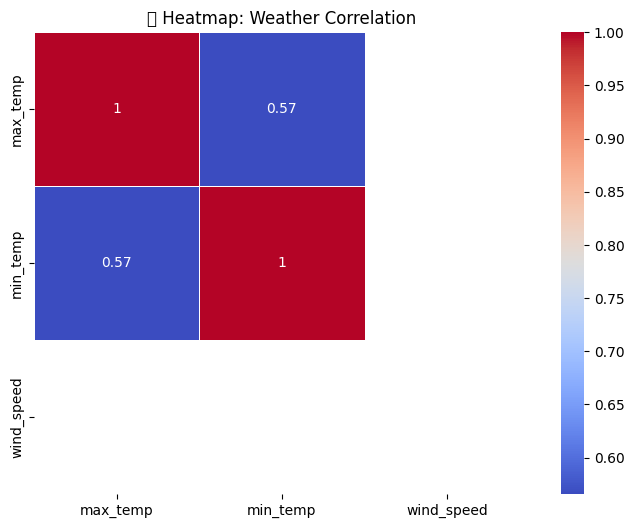

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["max_temp", "min_temp", "wind_speed"]].corr(),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔍 Heatmap: Weather Correlation")
plt.show()